In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
%pylab inline
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Populating the interactive namespace from numpy and matplotlib


In [2]:
wholeData = pd.read_csv('athlete_events.csv')

# Deal with null values in the columns
wholeData['Medal'].fillna('No Medal', inplace=True)
wholeData = wholeData[pd.notnull(wholeData['Height'])]
wholeData =wholeData[pd.notnull(wholeData['Age'])]
wholeData = wholeData[pd.notnull(wholeData['Weight'])]
# Include sex and team not null
wholeData = wholeData[pd.notnull(wholeData['Team'])]
wholeData = wholeData[pd.notnull(wholeData['Sex'])]

# Eliminate team sports, stick with individual sports
wholeData = wholeData[wholeData.Sport != "Basketball"]
wholeData = wholeData[wholeData.Sport != "Volleyball"]
wholeData = wholeData[wholeData.Sport != "Beach Volleyball"]
wholeData = wholeData[wholeData.Sport != "Rugby"]
wholeData = wholeData[wholeData.Sport != "Curling"]
wholeData = wholeData[wholeData.Sport != "Bobsleigh"]
wholeData = wholeData[wholeData.Sport != "Football"]
wholeData = wholeData[wholeData.Sport != "Ice Hockey"]
wholeData = wholeData[wholeData.Sport != "Hockey"]
wholeData = wholeData[wholeData.Sport != "Baseball"]
wholeData = wholeData[wholeData.Sport != "Softball"]
wholeData = wholeData[wholeData.Sport != "Handball"]
wholeData.drop(wholeData[wholeData['Sport'] == "Tug-of-War"].index, inplace = True) 


wholeData.head(100)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No Medal
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,No Medal
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,No Medal
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,No Medal


In [3]:

# Creating binary columns for medals
def goldmedal(data)  :
    if data["Medal"] == "Gold" :
        return 1 
    else :
        return 0
def silvermedal(data)  :
    if data["Medal"] == "Silver" :
        return 1 
    else :
        return 0
def bronzemedal(data)  :
    if data["Medal"] == "Bronze" :
        return 1 
    else :
        return 0

# Make new columns for gold, silver, bronze and total medals
wholeData["Gold"]   = wholeData.apply(lambda wholeData:goldmedal(wholeData),axis = 1) 
wholeData["Silver"] = wholeData.apply(lambda wholeData:silvermedal(wholeData),axis = 1) 
wholeData["Bronze"] = wholeData.apply(lambda wholeData:bronzemedal(wholeData),axis = 1) 
wholeData["Total Medals"] = wholeData["Gold"] + wholeData["Silver"] + wholeData["Bronze"]

wholeData.head(100)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Gold,Silver,Bronze,Total Medals
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0,0,0,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,0,0,0,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,0,0,0,0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal,0,0,0,0
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,0,0,0,0
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No Medal,0,0,0,0
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,0,0,0,0
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,No Medal,0,0,0,0
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,No Medal,0,0,0,0
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,No Medal,0,0,0,0


In [4]:
# Read in NOC data
nocData = pd.read_csv('noc_regions.csv')
nocData.drop('notes', axis = 1 , inplace = True)
nocData.rename(columns = {'region':'Country'}, inplace = True)

nocData.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [5]:
# Merging nocData and wholeData
olympicData = wholeData.merge(nocData,
                                left_on = 'NOC',
                                right_on = 'NOC',
                                how = 'left')

In [6]:
# Check if there are missing matches
olympicData.loc[olympicData['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
1717,SGP,Singapore
4075,ROT,Refugee Olympic Athletes
29002,SGP,June Climene
41705,TUV,Tuvalu
63084,SGP,Rika II
70428,SGP,Singapore-2
154751,SGP,Singapore-1


In [7]:
# Replace with correct team names
olympicData['Country'] = np.where(olympicData['NOC']=='SGP', 'Singapore', olympicData['Country'])
olympicData['Country'] = np.where(olympicData['NOC']=='ROT', 'Refugee Olympic Athletes', olympicData['Country'])
olympicData['Country'] = np.where(olympicData['NOC']=='TUV', 'Tuvalu', olympicData['Country'])


# Put these values from Country into Team
olympicData.drop('Team', axis = 1, inplace = True)
olympicData.rename(columns = {'Country': 'Team'}, inplace = True)

In [8]:
# Read in the population data. Data from https://www.kaggle.com/centurion1986/countries-population
worldPop = pd.read_csv('WorldPopulation.csv')

worldPop.drop(['Indicator Name', 'Indicator Code', 'Unnamed: 61'], axis = 1, inplace = True)

worldPop  = pd.melt(worldPop, id_vars = ['Country', 'Country Code'], var_name = 'Year', value_name = 'Population')

# Change the 'Year' to integer type
worldPop['Year'] = pd.to_numeric(worldPop['Year'])

worldPop.head()

,Country,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0


In [9]:
# Merge to get country code
olympicCountryCode = olympicData.merge(worldPop[['Country', 'Country Code']].drop_duplicates(),
                                            left_on = 'Team',
                                            right_on = 'Country',
                                            how = 'left')

olympicCountryCode.drop('Country', axis = 1, inplace = True)

# Merge to get population
olympicPop = olympicCountryCode.merge(worldPop,
                                                left_on = ['Country Code', 'Year'],
                                                right_on = ['Country Code', 'Year'],
                                                how = 'left')

olympicPop.drop('Country', axis = 1, inplace = True)

olympicPop.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Sport,Event,Medal,Gold,Silver,Bronze,Total Medals,Team,Country Code,Population
0,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,...,Judo,Judo Men's Extra-Lightweight,No Medal,0,0,0,0,China,CHN,1.350695e+09
1,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,...,Speed Skating,Speed Skating Women's 500 metres,No Medal,0,0,0,0,Netherlands,NLD,1.476009e+07
2,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,...,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,0,0,0,0,Netherlands,NLD,1.476009e+07
3,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,1992 Winter,1992,Winter,...,Speed Skating,Speed Skating Women's 500 metres,No Medal,0,0,0,0,Netherlands,NLD,1.518417e+07
4,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,1992 Winter,1992,Winter,...,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,0,0,0,0,Netherlands,NLD,1.518417e+07


In [10]:
# Drop years below 1960 since population data only supports 1960 onwards
olympicdata = pd.DataFrame(olympicPop.loc[(olympicPop['Year']>1960), :])

# Drop null population data
olympicdata = olympicPop[pd.notnull(olympicPop['Population'])]
olympicdata

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Sport,Event,Medal,Gold,Silver,Bronze,Total Medals,Team,Country Code,Population
0,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,...,Judo,Judo Men's Extra-Lightweight,No Medal,0,0,0,0,China,CHN,1.350695e+09
1,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,...,Speed Skating,Speed Skating Women's 500 metres,No Medal,0,0,0,0,Netherlands,NLD,1.476009e+07
2,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,...,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,0,0,0,0,Netherlands,NLD,1.476009e+07
3,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,1992 Winter,1992,Winter,...,Speed Skating,Speed Skating Women's 500 metres,No Medal,0,0,0,0,Netherlands,NLD,1.518417e+07
4,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,1992 Winter,1992,Winter,...,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,0,0,0,0,Netherlands,NLD,1.518417e+07
5,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,NED,1994 Winter,1994,Winter,...,Speed Skating,Speed Skating Women's 500 metres,No Medal,0,0,0,0,Netherlands,NLD,1.538284e+07
6,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,NED,1994 Winter,1994,Winter,...,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,0,0,0,0,Netherlands,NLD,1.538284e+07
7,6,Per Knut Aaland,M,31.0,188.0,75.0,USA,1992 Winter,1992,Winter,...,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,No Medal,0,0,0,0,USA,USA,2.565140e+08
8,6,Per Knut Aaland,M,31.0,188.0,75.0,USA,1992 Winter,1992,Winter,...,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,No Medal,0,0,0,0,USA,USA,2.565140e+08
9,6,Per Knut Aaland,M,31.0,188.0,75.0,USA,1992 Winter,1992,Winter,...,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,No Medal,0,0,0,0,USA,USA,2.565140e+08


In [11]:
# Only Male athlete Data
olympicdataM = olympicdata[olympicdata['Sex']=='M']
olympicdataM

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Sport,Event,Medal,Gold,Silver,Bronze,Total Medals,Team,Country Code,Population
0,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,...,Judo,Judo Men's Extra-Lightweight,No Medal,0,0,0,0,China,CHN,1.350695e+09
7,6,Per Knut Aaland,M,31.0,188.0,75.0,USA,1992 Winter,1992,Winter,...,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,No Medal,0,0,0,0,USA,USA,2.565140e+08
8,6,Per Knut Aaland,M,31.0,188.0,75.0,USA,1992 Winter,1992,Winter,...,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,No Medal,0,0,0,0,USA,USA,2.565140e+08
9,6,Per Knut Aaland,M,31.0,188.0,75.0,USA,1992 Winter,1992,Winter,...,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,No Medal,0,0,0,0,USA,USA,2.565140e+08
10,6,Per Knut Aaland,M,31.0,188.0,75.0,USA,1992 Winter,1992,Winter,...,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,No Medal,0,0,0,0,USA,USA,2.565140e+08
11,6,Per Knut Aaland,M,33.0,188.0,75.0,USA,1994 Winter,1994,Winter,...,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,No Medal,0,0,0,0,USA,USA,2.631260e+08
12,6,Per Knut Aaland,M,33.0,188.0,75.0,USA,1994 Winter,1994,Winter,...,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,No Medal,0,0,0,0,USA,USA,2.631260e+08
13,6,Per Knut Aaland,M,33.0,188.0,75.0,USA,1994 Winter,1994,Winter,...,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,No Medal,0,0,0,0,USA,USA,2.631260e+08
14,6,Per Knut Aaland,M,33.0,188.0,75.0,USA,1994 Winter,1994,Winter,...,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,No Medal,0,0,0,0,USA,USA,2.631260e+08
15,7,John Aalberg,M,31.0,183.0,72.0,USA,1992 Winter,1992,Winter,...,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,No Medal,0,0,0,0,USA,USA,2.565140e+08


In [12]:
# Convert teams into idTeam to use as a numeric variable
olympicdataM['idTeam'] = olympicdataM.groupby(['Team']).ngroup()
olympicdataM

C:\Users\maski\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Event,Medal,Gold,Silver,Bronze,Total Medals,Team,Country Code,Population,idTeam
0,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,...,Judo Men's Extra-Lightweight,No Medal,0,0,0,0,China,CHN,1.350695e+09,34
7,6,Per Knut Aaland,M,31.0,188.0,75.0,USA,1992 Winter,1992,Winter,...,Cross Country Skiing Men's 10 kilometres,No Medal,0,0,0,0,USA,USA,2.565140e+08,166
8,6,Per Knut Aaland,M,31.0,188.0,75.0,USA,1992 Winter,1992,Winter,...,Cross Country Skiing Men's 50 kilometres,No Medal,0,0,0,0,USA,USA,2.565140e+08,166
9,6,Per Knut Aaland,M,31.0,188.0,75.0,USA,1992 Winter,1992,Winter,...,Cross Country Skiing Men's 10/15 kilometres Pu...,No Medal,0,0,0,0,USA,USA,2.565140e+08,166
10,6,Per Knut Aaland,M,31.0,188.0,75.0,USA,1992 Winter,1992,Winter,...,Cross Country Skiing Men's 4 x 10 kilometres R...,No Medal,0,0,0,0,USA,USA,2.565140e+08,166
11,6,Per Knut Aaland,M,33.0,188.0,75.0,USA,1994 Winter,1994,Winter,...,Cross Country Skiing Men's 10 kilometres,No Medal,0,0,0,0,USA,USA,2.631260e+08,166
12,6,Per Knut Aaland,M,33.0,188.0,75.0,USA,1994 Winter,1994,Winter,...,Cross Country Skiing Men's 30 kilometres,No Medal,0,0,0,0,USA,USA,2.631260e+08,166
13,6,Per Knut Aaland,M,33.0,188.0,75.0,USA,1994 Winter,1994,Winter,...,Cross Country Skiing Men's 10/15 kilometres Pu...,No Medal,0,0,0,0,USA,USA,2.631260e+08,166
14,6,Per Knut Aaland,M,33.0,188.0,75.0,USA,1994 Winter,1994,Winter,...,Cross Country Skiing Men's 4 x 10 kilometres R...,No Medal,0,0,0,0,USA,USA,2.631260e+08,166
15,7,John Aalberg,M,31.0,183.0,72.0,USA,1992 Winter,1992,Winter,...,Cross Country Skiing Men's 10 kilometres,No Medal,0,0,0,0,USA,USA,2.565140e+08,166


In [13]:
# Extract "Swimming Men's 100 metres Backstroke"
backstrokeM = olympicdataM[olympicdataM["Event"] == "Swimming Men's 100 metres Backstroke"]
backstrokeM

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Event,Medal,Gold,Silver,Bronze,Total Medals,Team,Country Code,Population,idTeam
524,509,Gary Abraham,M,17.0,175.0,64.0,GBR,1976 Summer,1976,Summer,...,Swimming Men's 100 metres Backstroke,No Medal,0,0,0,0,UK,GBR,5.621197e+07,165
526,509,Gary Abraham,M,21.0,175.0,64.0,GBR,1980 Summer,1980,Summer,...,Swimming Men's 100 metres Backstroke,No Medal,0,0,0,0,UK,GBR,5.631422e+07,165
630,572,Rui Pinto de Abreu,M,19.0,177.0,64.0,POR,1980 Summer,1980,Summer,...,Swimming Men's 100 metres Backstroke,No Medal,0,0,0,0,Portugal,PRT,9.766312e+06,129
654,598,Omar Abu-Fares,M,19.0,178.0,69.0,JOR,2004 Summer,2004,Summer,...,Swimming Men's 100 metres Backstroke,No Medal,0,0,0,0,Jordan,JOR,5.535595e+06,80
735,650,Javier Carlos Acevedo,M,18.0,182.0,68.0,CAN,2016 Summer,2016,Summer,...,Swimming Men's 100 metres Backstroke,No Medal,0,0,0,0,Canada,CAN,3.628642e+07,29
811,718,Luis Angel Acosta,M,20.0,180.0,73.0,MEX,1968 Summer,1968,Summer,...,Swimming Men's 100 metres Backstroke,No Medal,0,0,0,0,Mexico,MEX,4.889402e+07,103
999,873,Mehdi Addadi,M,28.0,179.0,70.0,ALG,2000 Summer,2000,Summer,...,Swimming Men's 100 metres Backstroke,No Medal,0,0,0,0,Algeria,DZA,3.118366e+07,2
1330,1157,Olivr gh,M,17.0,187.0,78.0,HUN,1992 Summer,1992,Summer,...,Swimming Men's 100 metres Backstroke,No Medal,0,0,0,0,Hungary,HUN,1.036934e+07,69
2255,2008,Noah Abdalaziz Al-Khulaifi,M,17.0,190.0,86.0,QAT,2016 Summer,2016,Summer,...,Swimming Men's 100 metres Backstroke,No Medal,0,0,0,0,Qatar,QAT,2.569804e+06,131
2268,2020,Faisal Al-Mahmeed,M,16.0,180.0,72.0,KUW,2000 Summer,2000,Summer,...,Swimming Men's 100 metres Backstroke,No Medal,0,0,0,0,Kuwait,KWT,2.050741e+06,85


In [14]:
# Separate medals and no medals
backstrokeMNoMedals = backstrokeM[backstrokeM["Medal"] == "No Medal"]
backstrokeMMedals = backstrokeM[backstrokeM["Medal"] != "No Medal"]

# Number of No Medals
backstrokeMedalCount = backstrokeM["Medal"].value_counts()
print(backstrokeMedalCount)

No Medal    477
Bronze       15
Silver       14
Gold         13
Name: Medal, dtype: int64


In [15]:
# Extract Response and Predictors
predictors = ["Height", "Weight", "Age"]

y = pd.DataFrame(backstrokeM['Medal'].astype('category'))
X = pd.DataFrame(backstrokeM[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [16]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9305912596401028

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9076923076923077



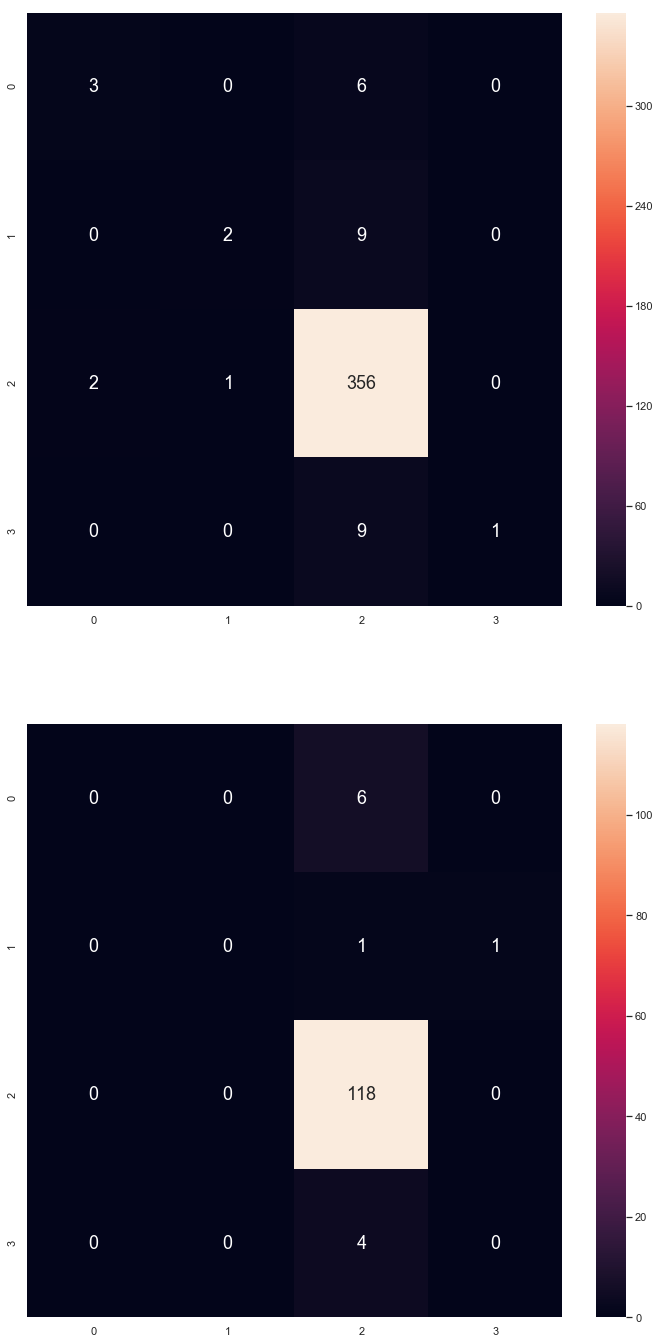

In [17]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

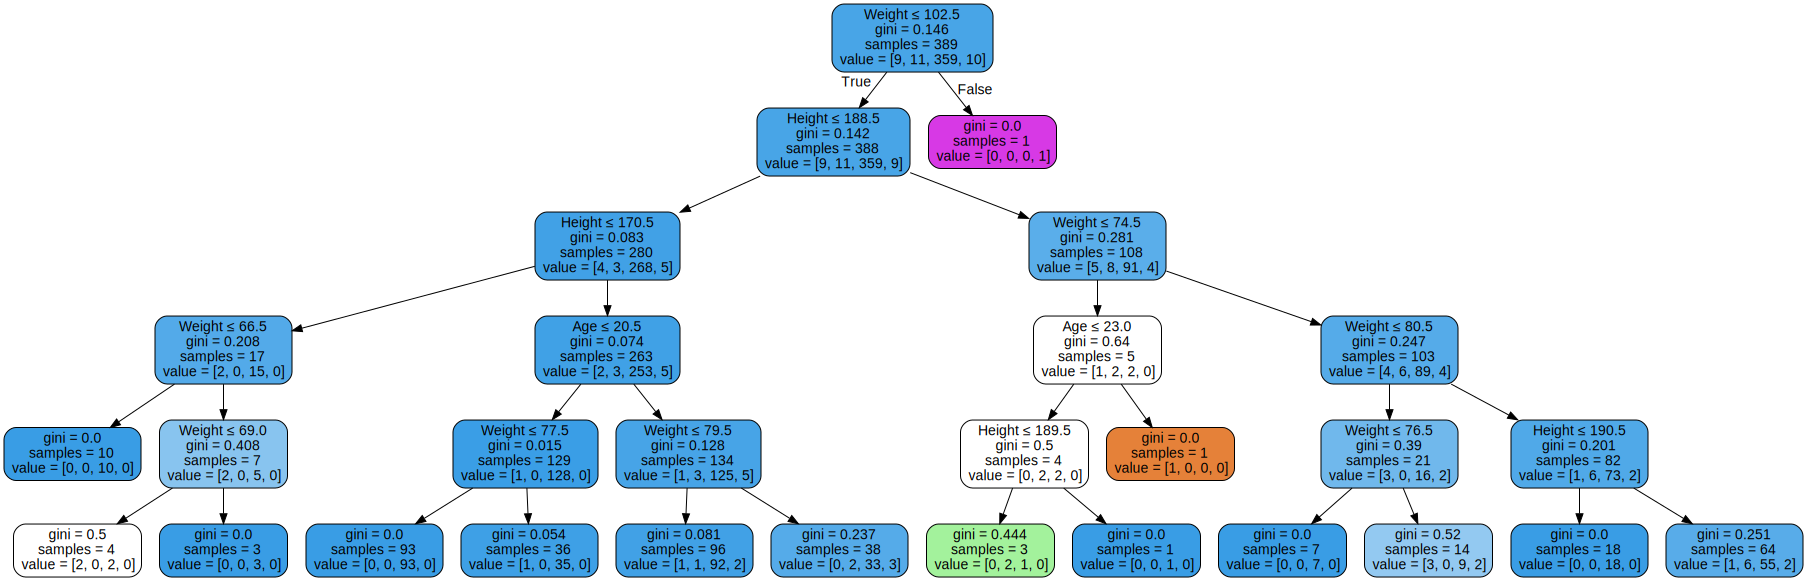

In [18]:
# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

### Swimming Men's 100 metres Backstroke Resampled

In [19]:
# Import resample()
from sklearn.utils import resample

# Upsample medalled counts
backstrokeMMedalsUpsampled = resample(backstrokeMMedals, replace=True,
                                                           n_samples = 477,
                                                           random_state = 123)

In [20]:
backstrokeMResampled = pd.concat([backstrokeMNoMedals, backstrokeMMedalsUpsampled])
backstrokeMResampled["Medal"].value_counts()

No Medal    477
Bronze      189
Silver      158
Gold        130
Name: Medal, dtype: int64

In [21]:
# Extract Response and Predictors
predictors = ["Height", "Weight", "Age", "idTeam", "Population"]

y = pd.DataFrame(backstrokeMResampled['Medal'].astype('category'))
X = pd.DataFrame(backstrokeMResampled[predictors]) 
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [22]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7090909090909091

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7322175732217573



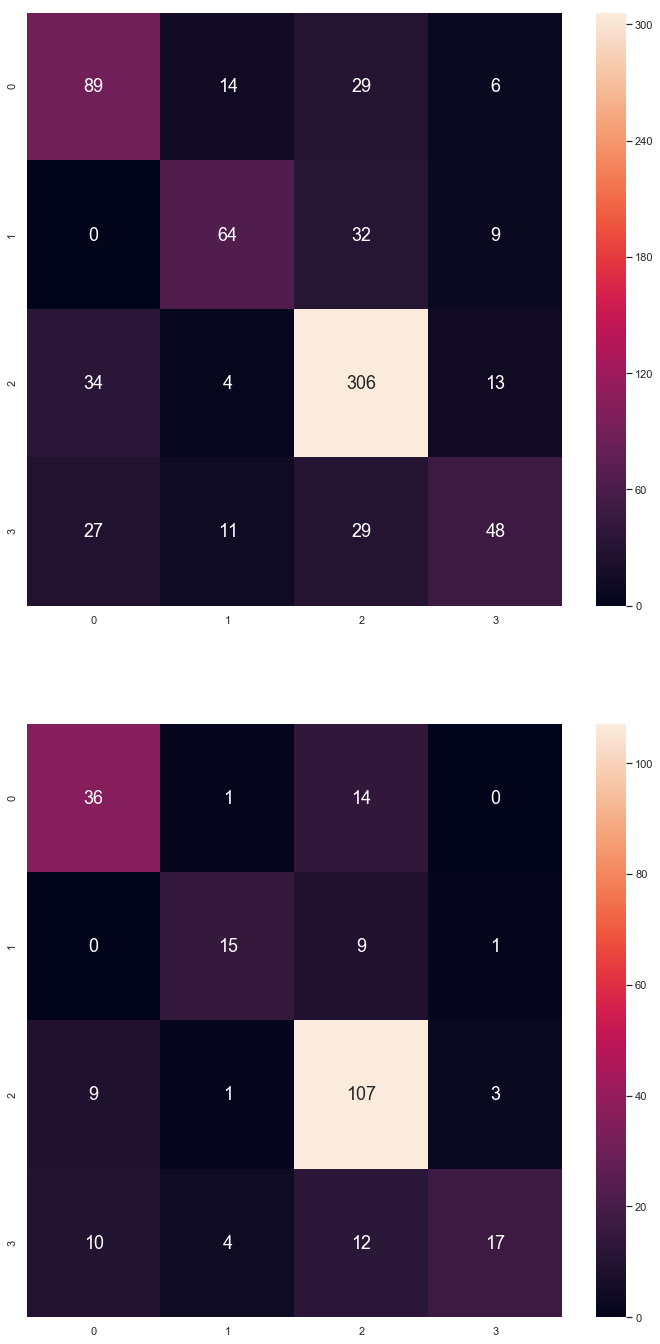

In [23]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

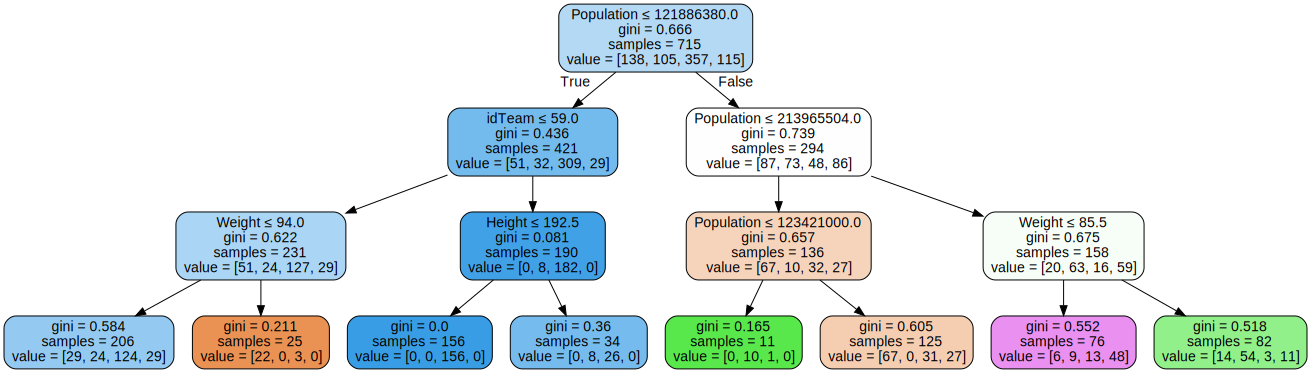

In [24]:
# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

In [25]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 200,  # n_estimators denote number of trees
                                 max_depth = 5)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

C:\Users\maski\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9286713286713286

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9456066945606695



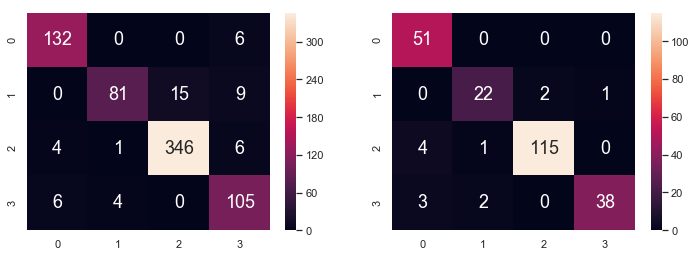

In [26]:
# Predict medal values corresponding to Total
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [27]:
# Extract Athletes for Prediction
backstrokeM_pred = backstrokeMResampled[backstrokeMResampled["Name"].isin(["Stev Theloke","Matthew James \"Matt\" Welsh", "Lenny Krayzelburg"])]
backstrokeM_pred = backstrokeM_pred.drop_duplicates()
backstrokeM_pred

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Event,Medal,Gold,Silver,Bronze,Total Medals,Team,Country Code,Population,idTeam
82840,63912,Lenny Krayzelburg,M,28.0,187.0,87.0,USA,2004 Summer,2004,Summer,...,Swimming Men's 100 metres Backstroke,No Medal,0,0,0,0,USA,USA,292805298.0,166
156456,119568,Stev Theloke,M,18.0,202.0,100.0,GER,1996 Summer,1996,Summer,...,Swimming Men's 100 metres Backstroke,No Medal,0,0,0,0,Germany,DEU,81914831.0,58
169483,129561,"Matthew James ""Matt"" Welsh",M,27.0,188.0,80.0,AUS,2004 Summer,2004,Summer,...,Swimming Men's 100 metres Backstroke,No Medal,0,0,0,0,Australia,AUS,20127400.0,9
169480,129561,"Matthew James ""Matt"" Welsh",M,23.0,188.0,80.0,AUS,2000 Summer,2000,Summer,...,Swimming Men's 100 metres Backstroke,Silver,0,1,0,1,Australia,AUS,19153000.0,9
156459,119568,Stev Theloke,M,22.0,202.0,100.0,GER,2000 Summer,2000,Summer,...,Swimming Men's 100 metres Backstroke,Bronze,0,0,1,1,Germany,DEU,82211508.0,58
82837,63912,Lenny Krayzelburg,M,24.0,187.0,87.0,USA,2000 Summer,2000,Summer,...,Swimming Men's 100 metres Backstroke,Gold,1,0,0,1,USA,USA,282162411.0,166


In [28]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(backstrokeM_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = rforest.predict(X_pred)
y_pred

array(['Gold', 'No Medal', 'No Medal', 'Silver', 'Bronze', 'Gold'],
      dtype=object)

In [29]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["Prediction"], index = backstrokeM_pred.index)
maledata_acc = pd.concat([backstrokeM_pred[["Name", "Games", "Medal"]], y_pred], axis = 1)

maledata_acc

,Name,Games,Medal,Prediction
82840,Lenny Krayzelburg,2004 Summer,No Medal,Gold
156456,Stev Theloke,1996 Summer,No Medal,No Medal
169483,"Matthew James ""Matt"" Welsh",2004 Summer,No Medal,No Medal
169480,"Matthew James ""Matt"" Welsh",2000 Summer,Silver,Silver
156459,Stev Theloke,2000 Summer,Bronze,Bronze
82837,Lenny Krayzelburg,2000 Summer,Gold,Gold


In [30]:
importances = pd.DataFrame({'Variables':X_train.columns, 'Importance':np.round(rforest.feature_importances_, 3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Variables')
importances

,Importance
Variables,
Population,0.319
idTeam,0.219
Weight,0.177
Height,0.153
Age,0.131


### Athletics Men's 100 Metres Resampled

In [31]:
athlmen = olympicdataM[olympicdataM["Event"] == "Athletics Men's 100 metres"]
athlmen

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Event,Medal,Gold,Silver,Bronze,Total Medals,Team,Country Code,Population,idTeam
143,96,Carlos Rodolfo Abaunza Balladares,M,18.0,168.0,60.0,NCA,2004 Summer,2004,Summer,...,Athletics Men's 100 metres,No Medal,0,0,0,0,Nicaragua,NIC,5.309703e+06,116
179,129,Ruslan Abbasov,M,22.0,181.0,74.0,AZE,2008 Summer,2008,Summer,...,Athletics Men's 100 metres,No Medal,0,0,0,0,Azerbaijan,AZE,8.763400e+06,11
210,168,Younis Abdallah Rabee,M,23.0,169.0,68.0,KUW,1972 Summer,1972,Summer,...,Athletics Men's 100 metres,No Medal,0,0,0,0,Kuwait,KWT,8.546040e+05,85
310,313,"Lawal Kolawole ""Kola"" Abdulai",M,21.0,172.0,66.0,NGR,1968 Summer,1968,Summer,...,Athletics Men's 100 metres,No Medal,0,0,0,0,Nigeria,NGA,5.350598e+07,118
312,313,"Lawal Kolawole ""Kola"" Abdulai",M,25.0,172.0,66.0,NGR,1972 Summer,1972,Summer,...,Athletics Men's 100 metres,No Medal,0,0,0,0,Nigeria,NGA,5.866260e+07,118
541,517,Glen Abrahams Martnez,M,22.0,179.0,72.0,CRC,1984 Summer,1984,Summer,...,Athletics Men's 100 metres,No Medal,0,0,0,0,Costa Rica,CRI,2.659781e+06,37
543,518,Guy A. Abrahams,M,23.0,173.0,65.0,PAN,1976 Summer,1976,Summer,...,Athletics Men's 100 metres,No Medal,0,0,0,0,Panama,PAN,1.791453e+06,123
648,590,Mohamed Abu Abdullah,M,27.0,173.0,74.0,BAN,2008 Summer,2008,Summer,...,Athletics Men's 100 metres,No Medal,0,0,0,0,Bangladesh,BGD,1.488058e+08,13
846,764,Idrissa Adam,M,27.0,178.0,79.0,CMR,2012 Summer,2012,Summer,...,Athletics Men's 100 metres,No Medal,0,0,0,0,Cameroon,CMR,2.108238e+07,28
852,770,Marcus Adam,M,24.0,182.0,82.0,GBR,1992 Summer,1992,Summer,...,Athletics Men's 100 metres,No Medal,0,0,0,0,UK,GBR,5.758040e+07,165


In [32]:
# Separate medals and no medals
athlmenNoMed = athlmen[athlmen["Medal"] == "No Medal"]
athlmenMed = athlmen[athlmen["Medal"] != "No Medal"]

# Number of No Medals
athlmenMedCount = athlmen["Medal"].value_counts()
print(athlmenMedCount)

No Medal    941
Bronze       14
Gold         14
Silver       13
Name: Medal, dtype: int64


In [33]:
# Upsample medalled counts
athlmenUpsampled = resample(athlmenMed, replace=True,
                                        n_samples = 941,
                                        random_state = 123)

In [34]:
athlmenResampled = pd.concat([athlmenNoMed, athlmenUpsampled])
athlmenResampled["Medal"].value_counts()

No Medal    941
Gold        328
Bronze      320
Silver      293
Name: Medal, dtype: int64

In [35]:
# Extract Response and Predictors
predictors = ["Height", "Weight", "Age", "Population", "idTeam"]

y = pd.DataFrame(athlmenResampled['Medal'].astype('category'))
X = pd.DataFrame(athlmenResampled[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [36]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 200,  # n_estimators denote number of trees
                                 max_depth = 5)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

C:\Users\maski\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9050318922749823

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8853503184713376



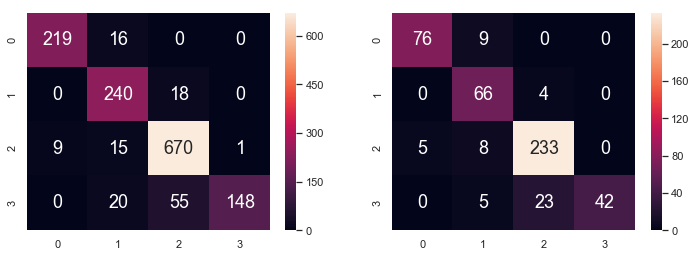

In [37]:
# Predict medal values corresponding to Total
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [38]:
# Extract Athletes for Prediction
athlmen_pred = athlmenResampled[athlmenResampled["Name"].isin(["Justin Alexander Gatlin","Yohan Blake", "Usain St. Leo Bolt"])]
athlmen_pred = athlmen_pred.drop_duplicates()

In [39]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(athlmen_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = rforest.predict(X_pred)
y_pred

array(['No Medal', 'Gold', 'Gold', 'Silver', 'Gold', 'Gold', 'Bronze',
       'Silver'], dtype=object)

In [40]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["Prediction"], index = athlmen_pred.index)
maledata_acc = pd.concat([athlmen_pred[["Name", "Games", "Medal"]], y_pred], axis = 1)

maledata_acc

,Name,Games,Medal,Prediction
15005,Yohan Blake,2016 Summer,No Medal,No Medal
16181,Usain St. Leo Bolt,2008 Summer,Gold,Gold
49849,Justin Alexander Gatlin,2004 Summer,Gold,Gold
49854,Justin Alexander Gatlin,2016 Summer,Silver,Silver
16187,Usain St. Leo Bolt,2016 Summer,Gold,Gold
16184,Usain St. Leo Bolt,2012 Summer,Gold,Gold
49852,Justin Alexander Gatlin,2012 Summer,Bronze,Bronze
15002,Yohan Blake,2012 Summer,Silver,Silver


In [41]:
importances = pd.DataFrame({'Variables':X_train.columns, 'Importance':np.round(rforest.feature_importances_, 3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Variables')
importances

,Importance
Variables,
Weight,0.245
Height,0.233
idTeam,0.233
Population,0.192
Age,0.097


# Women's sports only

In [42]:
olympicdataF = olympicdata[olympicdata['Sex']=='F']
olympicdataF['idTeam'] = olympicdataF.groupby(['Team']).ngroup()
olympicdataF

C:\Users\maski\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Event,Medal,Gold,Silver,Bronze,Total Medals,Team,Country Code,Population,idTeam
1,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,...,Speed Skating Women's 500 metres,No Medal,0,0,0,0,Netherlands,NLD,14760094.0,114
2,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,...,"Speed Skating Women's 1,000 metres",No Medal,0,0,0,0,Netherlands,NLD,14760094.0,114
3,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,1992 Winter,1992,Winter,...,Speed Skating Women's 500 metres,No Medal,0,0,0,0,Netherlands,NLD,15184166.0,114
4,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,1992 Winter,1992,Winter,...,"Speed Skating Women's 1,000 metres",No Medal,0,0,0,0,Netherlands,NLD,15184166.0,114
5,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,NED,1994 Winter,1994,Winter,...,Speed Skating Women's 500 metres,No Medal,0,0,0,0,Netherlands,NLD,15382838.0,114
6,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,NED,1994 Winter,1994,Winter,...,"Speed Skating Women's 1,000 metres",No Medal,0,0,0,0,Netherlands,NLD,15382838.0,114
25,13,Minna Maarit Aalto,F,30.0,159.0,55.5,FIN,1996 Summer,1996,Summer,...,Sailing Women's Windsurfer,No Medal,0,0,0,0,Finland,FIN,5124573.0,54
26,13,Minna Maarit Aalto,F,34.0,159.0,55.5,FIN,2000 Summer,2000,Summer,...,Sailing Women's Windsurfer,No Medal,0,0,0,0,Finland,FIN,5176209.0,54
27,14,Pirjo Hannele Aalto (Mattila-),F,32.0,171.0,65.0,FIN,1994 Winter,1994,Winter,...,Biathlon Women's 7.5 kilometres Sprint,No Medal,0,0,0,0,Finland,FIN,5088333.0,54
65,22,Andreea Aanei,F,22.0,170.0,125.0,ROU,2016 Summer,2016,Summer,...,Weightlifting Women's Super-Heavyweight,No Medal,0,0,0,0,Romania,ROU,19705301.0,132


## Women's rowing 

In [43]:
# Rowing Women's Single Sculls
RowingF = olympicdataF[olympicdataF["Event"] == "Rowing Women's Single Sculls"]
RowingF

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Event,Medal,Gold,Silver,Bronze,Total Medals,Team,Country Code,Population,idTeam
178,128,Soulmaz Abbasi Azad,F,28.0,173.0,60.0,IRI,2012 Summer,2012,Summer,...,Rowing Women's Single Sculls,No Medal,0,0,0,0,Iran,IRN,7.645357e+07,73
1371,1205,Christel Agrikola,F,23.0,173.0,66.0,FRG,1976 Summer,1976,Summer,...,Rowing Women's Single Sculls,No Medal,0,0,0,0,Germany,DEU,7.833695e+07,58
1554,1398,Heba Ahmed,F,23.0,176.0,72.0,EGY,2008 Summer,2008,Summer,...,Rowing Women's Single Sculls,No Medal,0,0,0,0,Egypt,EGY,8.095388e+07,48
1717,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.0,68.0,SGP,2016 Summer,2016,Summer,...,Rowing Women's Single Sculls,No Medal,0,0,0,0,Singapore,SGP,5.607283e+06,143
2859,2494,Yuliya Ivanovna Aleksandrova,F,21.0,178.0,73.0,RUS,2000 Summer,2000,Summer,...,Rowing Women's Single Sculls,No Medal,0,0,0,0,Russia,RUS,1.465966e+08,133
3905,3372,Ewa Ambroziak,F,25.0,174.0,70.0,POL,1976 Summer,1976,Summer,...,Rowing Women's Single Sculls,No Medal,0,0,0,0,Poland,POL,3.435630e+07,128
3908,3378,Mariann Ambrus-Feket,F,20.0,178.0,72.0,HUN,1976 Summer,1976,Summer,...,Rowing Women's Single Sculls,No Medal,0,0,0,0,Hungary,HUN,1.059868e+07,69
3909,3378,Mariann Ambrus-Feket,F,24.0,178.0,72.0,HUN,1980 Summer,1980,Summer,...,Rowing Women's Single Sculls,No Medal,0,0,0,0,Hungary,HUN,1.071112e+07,69
5175,4502,Annick Anthoine,F,30.0,170.0,65.0,FRA,1976 Summer,1976,Summer,...,Rowing Women's Single Sculls,No Medal,0,0,0,0,France,FRA,5.454149e+07,55
5275,4587,Yelena Petrovna Antonova,F,23.0,180.0,78.0,URS,1976 Summer,1976,Summer,...,Rowing Women's Single Sculls,Bronze,0,0,1,1,Russia,RUS,1.351470e+08,133


In [44]:
# Separate medals and no medals
RowFNoMed = RowingF[RowingF["Medal"] == "No Medal"]
RowFMed = RowingF[RowingF["Medal"] != "No Medal"]

# Number of No Medals
RowingFCount = RowingF["Medal"].value_counts()
print(RowingFCount)

No Medal    167
Gold         11
Silver       11
Bronze       10
Name: Medal, dtype: int64


In [45]:
Row = RowingF[RowingF["Games"] == "2012 Summer"]
Row = Row[Row["Medal"] != "No Medal"]
Row

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Event,Medal,Gold,Silver,Bronze,Total Medals,Team,Country Code,Population,idTeam
30332,23988,"Kimberley ""Kim"" Crow-Brennan",F,26.0,188.0,74.0,AUS,2012 Summer,2012,Summer,...,Rowing Women's Single Sculls,Bronze,0,0,1,1,Australia,AUS,22728254.0,9
41434,32879,Fie Udby Erichsen,F,27.0,184.0,79.0,DEN,2012 Summer,2012,Summer,...,Rowing Women's Single Sculls,Silver,0,1,0,1,Denmark,DNK,5591572.0,43
158674,121109,"Miroslava ""Mirka"" Topinkov Knapkov",F,31.0,181.0,72.0,CZE,2012 Summer,2012,Summer,...,Rowing Women's Single Sculls,Gold,1,0,0,1,Czech Republic,CZE,10510785.0,42


In [46]:
# Upsample medalled counts
RowFUpsampled = resample(RowFMed, replace=True,
                                        n_samples = 167,
                                        random_state = 123)
RowFResampled = pd.concat([RowFNoMed, RowFUpsampled])
RowFResampled["Medal"].value_counts()

No Medal    167
Silver       63
Bronze       56
Gold         48
Name: Medal, dtype: int64

In [47]:
# Extract Response and Predictors
predictors = ["Height", "Weight", "Age", "Population", "idTeam"]

y = pd.DataFrame(RowFResampled['Medal'].astype('category'))
X = pd.DataFrame(RowFResampled[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [48]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 5, oob_score = True)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

C:\Users\maski\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.948

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8690476190476191



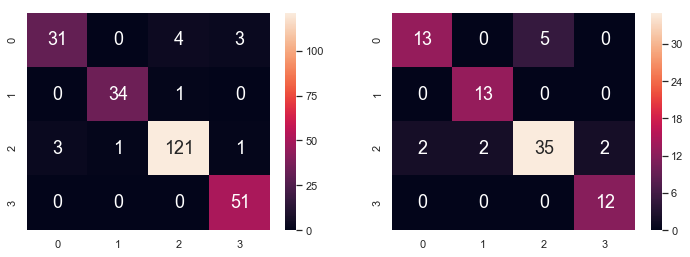

In [49]:
# Predict medal values corresponding to Total
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [50]:
# Extract Athletes for Prediction
rowF_pred = RowFResampled[RowFResampled["Name"].isin(["Fie Udby Erichsen","Kimberley \"Kim\" Crow-Brennan", "Miroslava \"Mirka\" Topinkov Knapkov"])]
rowF_pred = rowF_pred.drop_duplicates()

# Extract Predictors for Prediction
X_pred = pd.DataFrame(rowF_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = rforest.predict(X_pred)

In [51]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["Prediction"], index = rowF_pred.index)
femaledata_acc = pd.concat([rowF_pred[["Name", "Games", "Medal"]], y_pred], axis = 1)

femaledata_acc

,Name,Games,Medal,Prediction
41435,Fie Udby Erichsen,2016 Summer,No Medal,No Medal
158671,"Miroslava ""Mirka"" Topinkov Knapkov",2004 Summer,No Medal,No Medal
158672,"Miroslava ""Mirka"" Topinkov Knapkov",2008 Summer,No Medal,No Medal
158675,"Miroslava ""Mirka"" Topinkov Knapkov",2016 Summer,No Medal,No Medal
41434,Fie Udby Erichsen,2012 Summer,Silver,Silver
30334,"Kimberley ""Kim"" Crow-Brennan",2016 Summer,Gold,Gold
30332,"Kimberley ""Kim"" Crow-Brennan",2012 Summer,Bronze,Bronze
158674,"Miroslava ""Mirka"" Topinkov Knapkov",2012 Summer,Gold,No Medal


In [52]:
importances = pd.DataFrame({'Variables':X_train.columns, 'Importance':np.round(rforest.feature_importances_, 3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Variables')
importances

,Importance
Variables,
idTeam,0.318
Population,0.201
Weight,0.188
Age,0.157
Height,0.136


### Women's Skiing

In [53]:
# Cross Country Skiing Women's 10 Kilometres
SkiF = olympicdataF[olympicdataF["Event"] == "Cross Country Skiing Women's 10 kilometres"]
SkiF

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Event,Medal,Gold,Silver,Bronze,Total Medals,Team,Country Code,Population,idTeam
1049,904,Gun Margareta del (-Nilsson),F,25.0,163.0,52.0,SWE,1964 Winter,1964,Winter,...,Cross Country Skiing Women's 10 kilometres,No Medal,0,0,0,0,Sweden,SWE,7.661354e+06,153
4004,3464,Mathilde Amivi Petitjean,F,19.0,163.0,60.0,TOG,2014 Winter,2014,Winter,...,Cross Country Skiing Women's 10 kilometres,No Medal,0,0,0,0,Togo,TGO,7.228915e+06,159
4031,3473,Amanda Ammar,F,20.0,157.0,54.0,CAN,2006 Winter,2006,Winter,...,Cross Country Skiing Women's 10 kilometres,No Medal,0,0,0,0,Canada,CAN,3.257050e+07,29
4033,3473,Amanda Ammar,F,28.0,157.0,54.0,CAN,2014 Winter,2014,Winter,...,Cross Country Skiing Women's 10 kilometres,No Medal,0,0,0,0,Canada,CAN,3.554456e+07,29
4493,3951,Lina Marie Andersson,F,20.0,158.0,58.0,SWE,2002 Winter,2002,Winter,...,Cross Country Skiing Women's 10 kilometres,No Medal,0,0,0,0,Sweden,SWE,8.924958e+06,153
4497,3951,Lina Marie Andersson,F,24.0,158.0,58.0,SWE,2006 Winter,2006,Winter,...,Cross Country Skiing Women's 10 kilometres,No Medal,0,0,0,0,Sweden,SWE,9.080505e+06,153
4533,4005,Carola Anding (-Jacob),F,19.0,168.0,53.0,GDR,1980 Winter,1980,Winter,...,Cross Country Skiing Women's 10 kilometres,No Medal,0,0,0,0,Germany,DEU,7.828858e+07,58
4536,4005,Carola Anding (-Jacob),F,23.0,168.0,53.0,GDR,1984 Winter,1984,Winter,...,Cross Country Skiing Women's 10 kilometres,No Medal,0,0,0,0,Germany,DEU,7.785868e+07,58
4932,4318,Klara Angerer,F,19.0,164.0,60.0,ITA,1984 Winter,1984,Winter,...,Cross Country Skiing Women's 10 kilometres,No Medal,0,0,0,0,Italy,ITA,5.657672e+07,77
5307,4605,Maryna Mykolavna Antsybor,F,22.0,160.0,52.0,UKR,2010 Winter,2010,Winter,...,Cross Country Skiing Women's 10 kilometres,No Medal,0,0,0,0,Ukraine,UKR,4.587070e+07,167


In [54]:
# Separate medals and no medals
SkiFNoMed = SkiF[SkiF["Medal"] == "No Medal"]
SkiFMed = SkiF[SkiF["Medal"] != "No Medal"]

# Number of No Medals
SkiFCount = SkiF["Medal"].value_counts()
print(SkiFCount)

No Medal    505
Gold         12
Silver       11
Bronze       10
Name: Medal, dtype: int64


In [55]:
Skicheck = SkiFMed[SkiFMed["Games"] == "2002 Winter"]
Skicheck

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Event,Medal,Gold,Silver,Bronze,Total Medals,Team,Country Code,Population,idTeam
12103,9747,Stefania Belmondo,F,33.0,158.0,45.0,ITA,2002 Winter,2002,Winter,...,Cross Country Skiing Women's 10 kilometres,Bronze,0,0,1,1,Italy,ITA,57059007.0,77
25807,20403,Yuliya Anatolyevna Chepalova,F,25.0,164.0,54.0,RUS,2002 Winter,2002,Winter,...,Cross Country Skiing Women's 10 kilometres,Silver,0,1,0,1,Russia,RUS,145306046.0,133
145614,111599,Bente Skari-Martinsen,F,29.0,173.0,63.0,NOR,2002 Winter,2002,Winter,...,Cross Country Skiing Women's 10 kilometres,Gold,1,0,0,1,Norway,NOR,4538159.0,119


In [56]:
# Upsample medalled counts
SkiFUpsampled = resample(SkiFMed, replace=True,
                                        n_samples = 505,
                                        random_state = 123)
SkiFResampled = pd.concat([SkiFNoMed, SkiFUpsampled])
SkiFResampled["Medal"].value_counts()

No Medal    505
Gold        175
Silver      168
Bronze      162
Name: Medal, dtype: int64

In [57]:
# Extract Response and Predictors
predictors = ["Height", "Weight", "Age", "Population", "idTeam"]

y = pd.DataFrame(SkiFResampled['Medal'].astype('category'))
X = pd.DataFrame(SkiFResampled[predictors]) 
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [58]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 200,  # n_estimators denote number of trees
                                 max_depth = 5, oob_score = True)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

C:\Users\maski\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9445178335535006

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8972332015810277



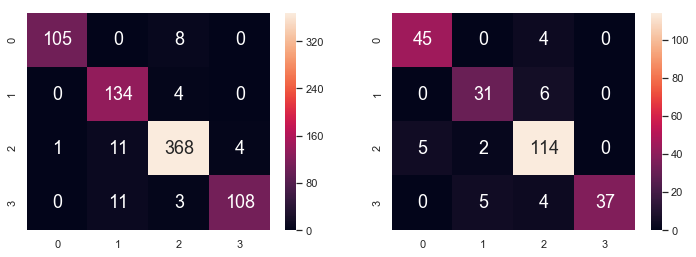

In [59]:
# Predict medal values corresponding to Total
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [60]:
# Extract Athletes for Prediction
SkiF_pred = SkiFResampled[SkiFResampled["Name"].isin(["Stefania Belmondo","Yuliya Anatolyevna Chepalova", "Bente Skari-Martinsen"])]
SkiF_pred = SkiF_pred.drop_duplicates()

# Extract Predictors for Prediction
X_pred = pd.DataFrame(SkiF_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = rforest.predict(X_pred)

In [61]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["Prediction"], index = SkiF_pred.index)
femaledata_acc = pd.concat([SkiF_pred[["Name", "Games", "Medal"]], y_pred], axis = 1)

femaledata_acc

,Name,Games,Medal,Prediction
12086,Stefania Belmondo,1988 Winter,No Medal,No Medal
25812,Yuliya Anatolyevna Chepalova,2006 Winter,No Medal,Silver
25807,Yuliya Anatolyevna Chepalova,2002 Winter,Silver,Silver
145614,Bente Skari-Martinsen,2002 Winter,Gold,Gold
12103,Stefania Belmondo,2002 Winter,Bronze,Bronze


In [62]:
importances = pd.DataFrame({'Variables':X_train.columns, 'Importance':np.round(rforest.feature_importances_, 3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Variables')
importances

,Importance
Variables,
Population,0.316
Age,0.238
idTeam,0.173
Height,0.142
Weight,0.132
